In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# read the 3 datasets
df1 = pd.read_csv("Challenger_Ranked_Games.csv")

df2 = pd.read_csv("GrandMaster_Ranked_Games.csv")

df3 = pd.read_csv("Master_Ranked_Games.csv")

In [5]:
# check their sizes
df1.shape , df2.shape , df3.shape

((26904, 50), (65896, 50), (107125, 50))

In [6]:
data = pd.DataFrame()

In [7]:
# we need to get the rank for each dataset
df1['rank'] = 'challenger'
df2['rank'] = 'grandMaster'
df3['rank'] = 'master'

In [8]:
# append all dataframe to a one df
data = data.append(df1, ignore_index=True)
data = data.append(df2, ignore_index=True)
data = data.append(df3, ignore_index=True)

In [9]:
# check new shape
data.shape

(199925, 51)

In [10]:
# check sample
data.sample(5)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,rank
67492,4223914837,710,1,0,1,0,0,1,0,0,...,9732,16355,100,28,5.6,24,1,2941,373,grandMaster
12006,4121656781,1685,0,0,0,0,0,0,0,0,...,76715,59713,641,76,15.2,199,8,28288,88357,challenger
166080,3980993175,2024,1,0,1,1,0,1,3,1,...,133717,71368,699,83,16.6,157,12,33050,62805,master
38304,4227246161,887,0,0,0,0,0,0,0,0,...,74199,50885,178,73,14.6,0,10,16508,7021,grandMaster
103117,4210546951,1983,1,0,1,1,0,1,2,1,...,96502,58693,705,76,15.2,126,7,36526,42291,master


In [9]:
# check columns
data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'rank

### Graph -1
####  What is the relationship between `redChampionDamageDealt` and `blueChampionDamageDealt` based on their ranks?. Does they show any differences?.

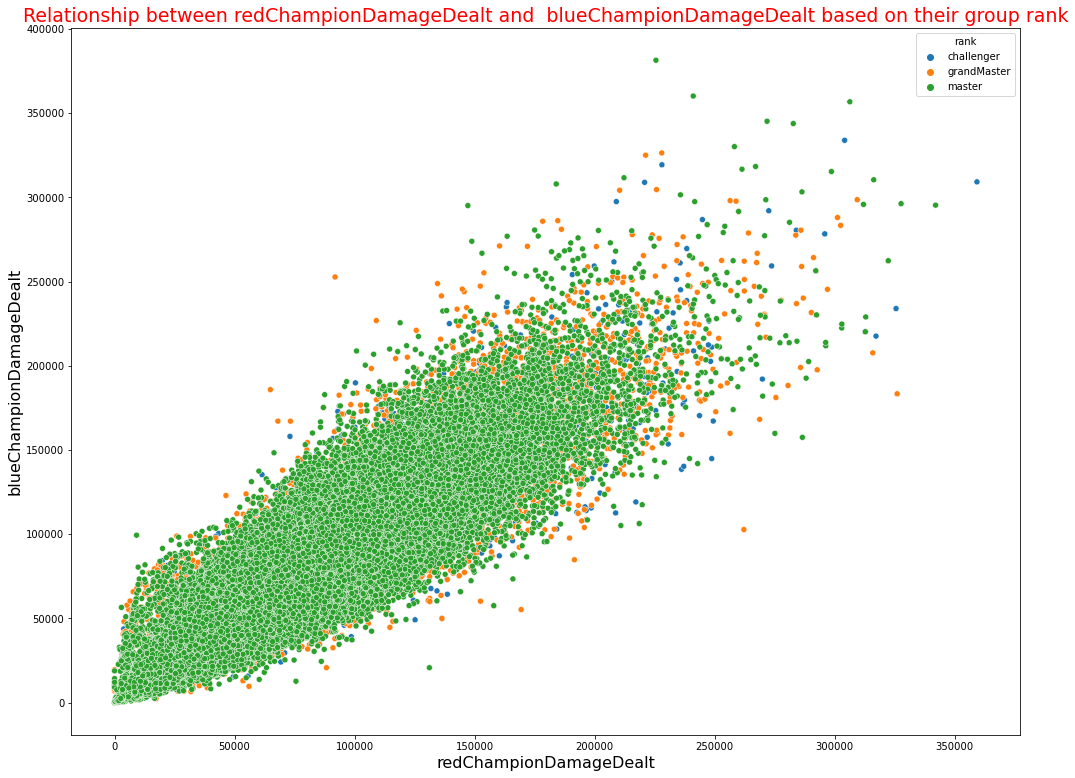

In [10]:
plt.figure(figsize=(17 , 13))
plt.title("Relationship between redChampionDamageDealt and  blueChampionDamageDealt based on their group rank" , fontsize = 19 , c ='r')
plt.xlabel("redChampionDamageDealt" , fontsize=16 , c ='black')
plt.ylabel("blueChampionDamageDealt" , fontsize=16 , c ='black')
sns.scatterplot(data['redChampionDamageDealt'] , data['blueChampionDamageDealt'] , hue = data['rank'])
plt.savefig("graph1_scatterplot.png")
plt.show()

### Observation
- Based on the graph , most of the champion damage dealt belong to master rank
- Challenger rank has damage dealts that are of very high followed by grandmaster and master has the lower values
- The graph also shows a linear relationship between `redChampionDamageDeal` and `blueChampionDamageDeal` hence an increase in one leads to an increase on the other

### Graph

- REgression plot between redChampionDealt and blueChampionDeal for first 500 datapoints in challenger rank

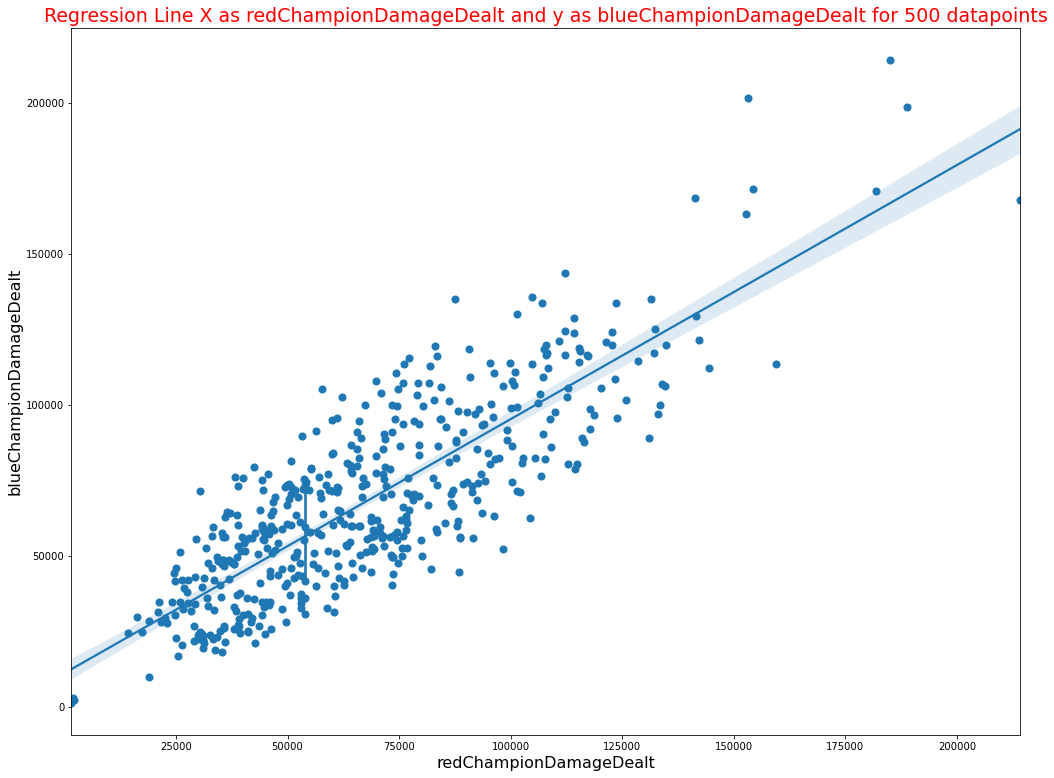

In [11]:
# create a regression plot for the above two columns

plt.figure(figsize=(17 , 13))
plt.title("Regression Line X as redChampionDamageDealt and y as blueChampionDamageDealt for 500 datapoints" , fontsize = 19 , c ='r')
plt.xlabel("redChampionDamageDealt" , fontsize=16 , c ='black')
plt.ylabel("blueChampionDamageDealt" , fontsize=16 , c ='black')

sns.regplot(x="redChampionDamageDealt", y="blueChampionDamageDealt", data=df1[:500] , x_estimator=np.mean);
plt.savefig("reg_scatterplot.png")
plt.show()

### Graph-2
####  What was the average duration that each game took. Was the average duration having a normal distribution accross all games?

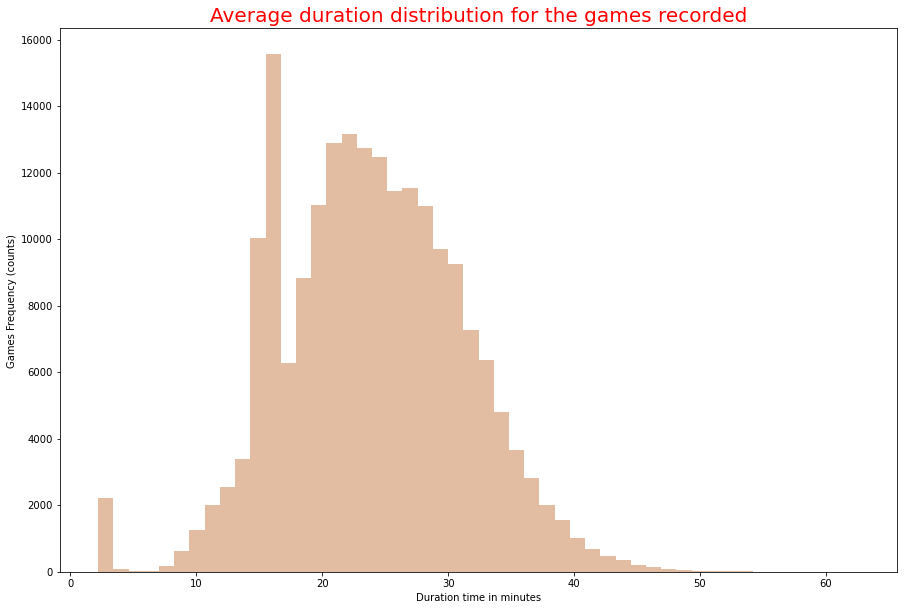

In [12]:
plt.figure(figsize=(15,10))
sns.distplot(data['gameDuraton']/60, hist=True, kde=False , color='#B85B14')
plt.title("Average duration distribution for the games recorded"  , fontsize =20 , c ='red')
sns.set(font_scale = 2)
plt.xlabel('Duration time in minutes')
plt.ylabel('Games Frequency (counts) ')
plt.savefig("graph2_gameduration.png")
plt.show()

In [13]:
print("Average game length: {:.2f} minutes".format(data['gameDuraton'].mean()/60))

Average game length: 23.89 minutes


### Observation
- The Average Game Time length is about 23.89 minutes
- The graph also shows a normal distribution of game duration hence there is no skewness
- Most games have average duration between around 17 minutes to around 37 minutes


### Graph -3
#### What are the most common variables that are good contributers to the team to win?
#### What is the top items with correlation greater than 0.5 against either blueWins or RedWins?

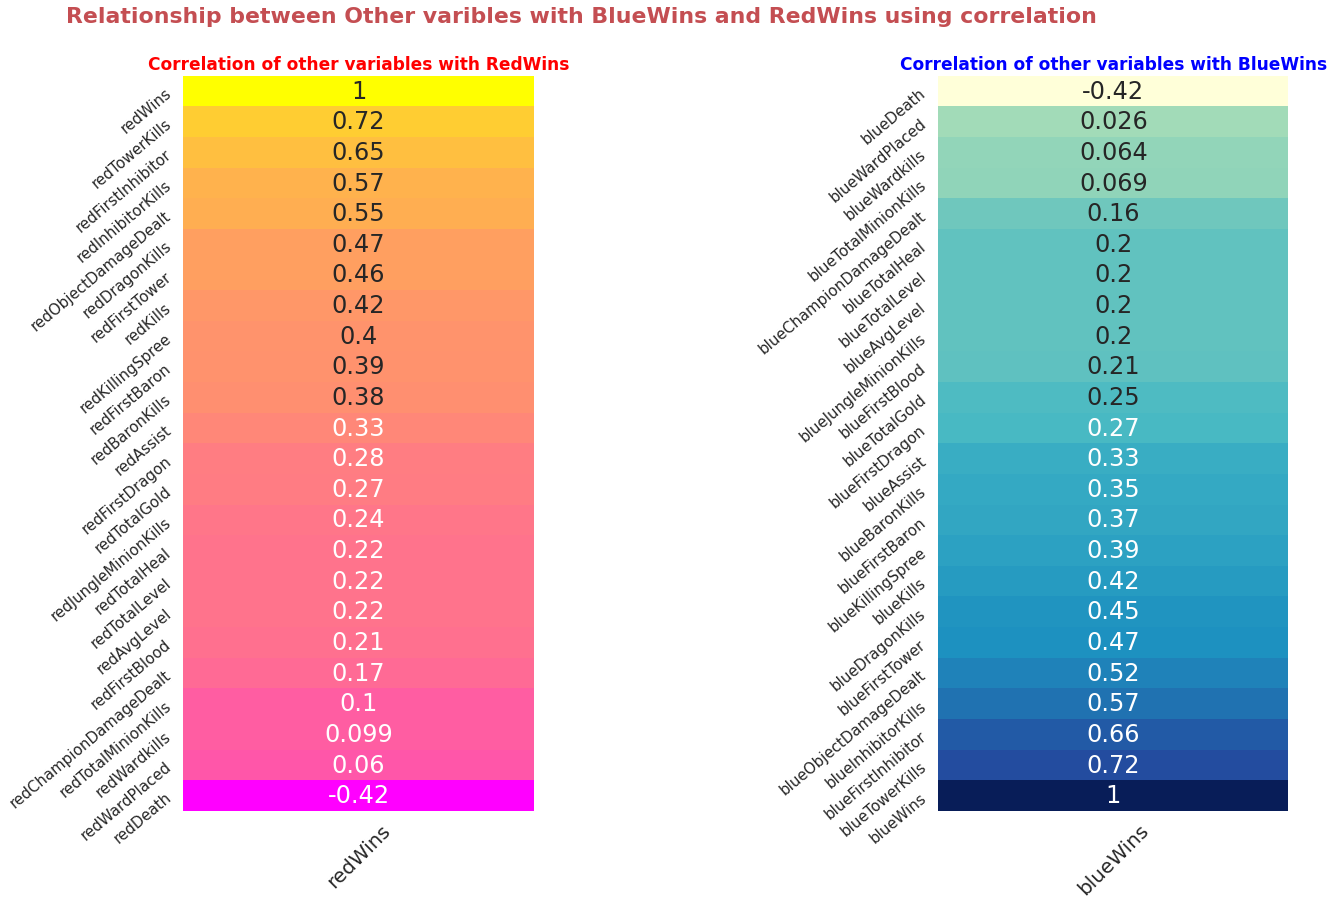

In [14]:
# we will get pearson correlation
# get correration between other variables and blueWins
blueWins_corr = data.drop('rank', axis=1).corr()['blueWins'][:].sort_values(axis=0, ascending=False) 
# redwins correlation
redWins_corr = data.drop('rank', axis=1).corr()['redWins'][:].sort_values(axis=0, ascending=False) 


# plot correlation heatmap graphs for the two
# only features that are of either blue or red wins will be selected respectively

fig, (ax1 , ax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.suptitle("Relationship between Other varibles with BlueWins and RedWins using correlation" , fontsize =22 , fontweight='bold' , c ='r')
redWins_correlation_cols = [col for col,corr_val in blueWins_corr.iteritems() if 'red' in col]
sns.heatmap(redWins_corr[redWins_correlation_cols].sort_values(
    axis=0, ascending=False).to_frame(), 
            annot=True, cbar=False, ax=ax1 , cmap='spring')

blueWins_correlation_cols = [col for col,corr_val in redWins_corr.iteritems() if 'blue' in col]
sns.heatmap(blueWins_corr[blueWins_correlation_cols].to_frame(), 
            annot=True, cbar=False, ax=ax2 , cmap='YlGnBu')
sns.set(font_scale = 1)
fig.tight_layout(w_pad=7)

# set titles
ax2.set_title("Correlation of other variables with BlueWins" , fontweight = 'bold' , fontsize=17 , c ='blue')
ax1.set_title("Correlation of other variables with RedWins" , fontweight = 'bold' , fontsize=17 , c ='red')
# set ticks params
ax2.xaxis.set_tick_params(which='both', rotation=45 , labelsize=20)
ax2.yaxis.set_tick_params(which='both', rotation=40 , labelsize=15)
ax1.xaxis.set_tick_params(which='both', rotation=45  , labelsize=20)
ax1.yaxis.set_tick_params(which='both', rotation=40  , labelsize=15)
fig.subplots_adjust(top=0.90)

plt.savefig("graph-3_Correlation.png")
plt.show()

### Observation
- Each variable  yields the same correlation whether  on red side or blue side.
- The correlation between wards placed/killed to wins is low. 
- Deaths i.e `blueDeath and redDeath ` affects negatively the win of the game.
-  Deaths, proves a greater chance to winning i.e by breaking the enemies base.
